# Simulation - Mô phỏng & Dữ liệu

Trong bài thực hành này, chúng ta sẽ sử dụng python và numpy để tính toán và thực hiện một số mô phỏng.

Những nội dung sẽ thực hiện trong tài liệu này:

- Mô phỏng dữ liệu
- Kiểm tra dữ liệu


In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t


## MÔ PHỎNG

### Bài 1: Mô phỏng tung đồng xu cân đối

Giả sử một đồng xu có hai mặt `Head` và `Tail`.

a. Định nghĩa hàm `toss_a_fair_coin`để mô phỏng việc tung đồng xu. Kết quả trả về là `H` hoặc `T` tương ứng với một trong hai mặt

```python
def toss_a_fair_coin():
    # ...
```

b. Thực hiện việc tung đồng xu n = 100 lần. Cho biết số lần xuất hiện của mỗi mặt. Lựa chọn đồ thị phù hợp để hiển thị kết quả trên.

số lượng mặt ngữa là 61
số lượng mặt sấp là 39


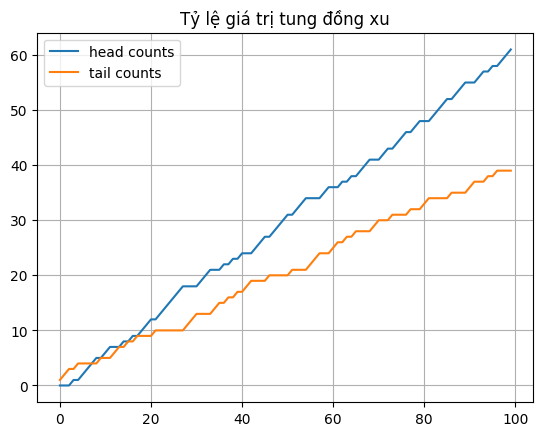

In [217]:
# YOUR CODE HERE
def toss_a_fair_coin():
    return random.choice(['H', "T"])

n1 =100

arr = []
count_H, count_T = 0, 0
head = [0]*n1
tail = [0]*n1


for x in range(n1):
    arr.append((np.array(toss_a_fair_coin())))
    if arr[x] == 'H':
        count_H +=1
    else: count_T +=1
    head[x] = (count_H)
    tail[x] = (count_T)
    
    
print(f"số lượng mặt ngữa là {count_H}")
print(f"số lượng mặt sấp là {count_T}")

plt.plot(range(100),head, label= 'head counts')
plt.plot(range(100),tail, label= 'tail counts')
plt.title("Tỷ lệ giá trị tung đồng xu")
plt.legend()
plt.grid()
plt.show()


### Bài 2: Mô phỏng tung đồng xu không cân đối

Giả sử có một đồng xu với hai mặt `H` và `T` không cân đối, với xác suất thu được mặt Head là 0.6, xác suất thu được mặt Tail là 0.4. Bạn hãy:

a. Định nghĩa hàm `toss_a_biased_coin`để mô phỏng việc tung đồng xu. Kết quả trả về là `H` hoặc `T` tương ứng với một trong hai mặt

```python
def toss_a_biased_coin(head_prob):
    '''
    Tung đồng xu không cân đối.
    Return: 'H' or 'T'
        head_prob: xác suất thu được mặt Head
    '''
    # ...
```

b. Thực hiện việc tung đồng xu n = 100 lần. Cho biết số lần xuất hiện của mỗi mặt. Tính tỷ lệ xuất hiện của mặt Head và Tail. Lựa chọn đồ thị phù hợp để hiển thị kết quả trên. 

c. Thực hiện việc tung đồng xu n = 10000 lần. Cho biết số lần xuất hiện của mỗi mặt. Tính tỷ lệ xuất hiện của mặt Head và Tail. Lựa chọn đồ thị phù hợp để hiển thị kết quả trên. 

d. Bạn có nhận xét gì?

In [218]:
def toss_a_biased_coin_2(probability_head):
    
    return random.choices(['H', 'T'], weights=[probability_head, 1 - probability_head])


# YOUR CODE HERE
def toss_a_biased_coin_1(head_prob):
    return "H" if random.random() < head_prob else "T"

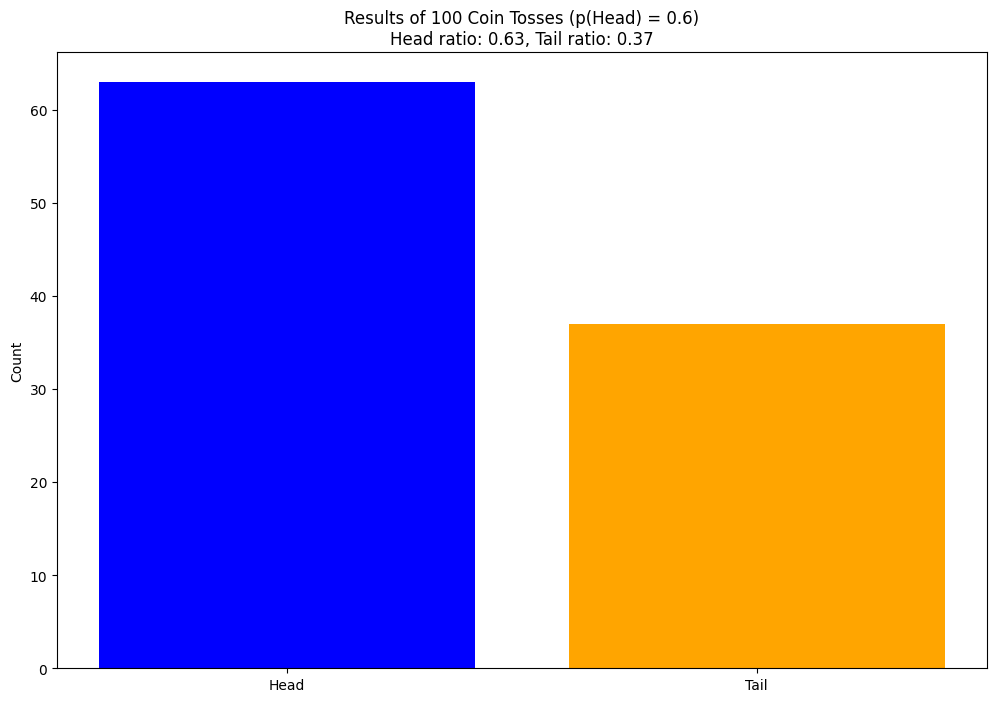

In [219]:


head_prob = 0.6

results = [toss_a_biased_coin_1(head_prob) for k in range(n1)]
countH = results.count("H")
countT = results.count("T")

head_ratio = countH / n1
tail_ratio = countT / n1

plt.figure(figsize= (12, 8))
plt.bar(['Head', 'Tail'], [countH, countT], color=['blue', 'orange'])
plt.title(f'Results of 100 Coin Tosses (p(Head) = 0.6)\nHead ratio: {head_ratio:.2f}, Tail ratio: {tail_ratio:.2f}')
plt.ylabel('Count')
plt.show()



tỷ lệ mặt ngữa là 0.62
tỷ lệ mặt sấp là 0.38


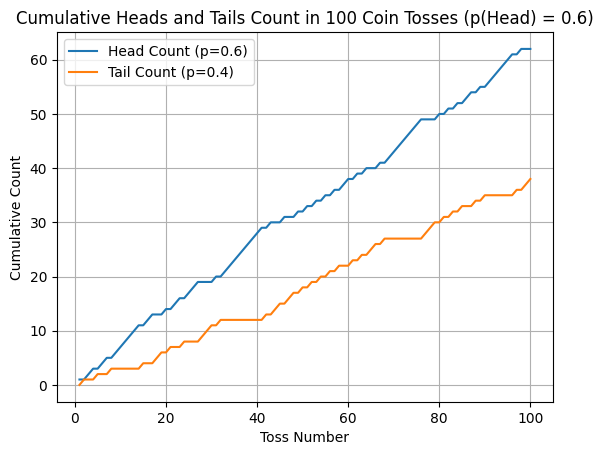

In [220]:


results_weighted = [toss_a_biased_coin_2(head_prob)[0] for _ in range(n1)]

# Đếm số lần xuất hiện của 'Head' và 'Tail' theo xác suất mới
head_count_weighted = [0] * n1
tail_count_weighted = [0] * n1
# Thực hiện việc cho giá trị tổng ban đầu của 2 mặt là 0 để thực hiện việc tính tiếp theo
head_total_weighted = 0
tail_total_weighted = 0

for i in range(n1):
    # Vơi mỗi lần xét 1 giá trị thì tăng giá trị lên để thực hiện việc so sánh bằng đường tăng trưởng
    if results_weighted[i] == 'H':
        head_total_weighted += 1 
    else:
        tail_total_weighted += 1
    head_count_weighted[i] = head_total_weighted
    tail_count_weighted[i] = tail_total_weighted


head_ratio = head_total_weighted / n1
tail_ratio = tail_total_weighted / n1
print(f"tỷ lệ mặt ngữa là {head_ratio}")
print(f"tỷ lệ mặt sấp là {tail_ratio}")

# Vẽ đồ thị với xác suất ra "Head" là 0.6
plt.plot(range(1, n1+1), head_count_weighted, label="Head Count (p=0.6)")
plt.plot(range(1, n1+1), tail_count_weighted, label="Tail Count (p=0.4)")
plt.xlabel("Toss Number")
plt.ylabel("Cumulative Count")
plt.title("Cumulative Heads and Tails Count in 100 Coin Tosses (p(Head) = 0.6)")
plt.legend()
plt.grid(True)
plt.show()


Thực hiện tung đồng xu 10000 lần. Cho biết só lần xuất hiện của mỗi mặt. Tính tỷ lệ xuất hiện của mặt Head và mặt Tail. Lựa chọn đồ thị phù hợp để hiển thị kết quả trên

tỷ lệ mặt ngữa là 0.6051
tỷ lệ mặt sấp là 0.3949


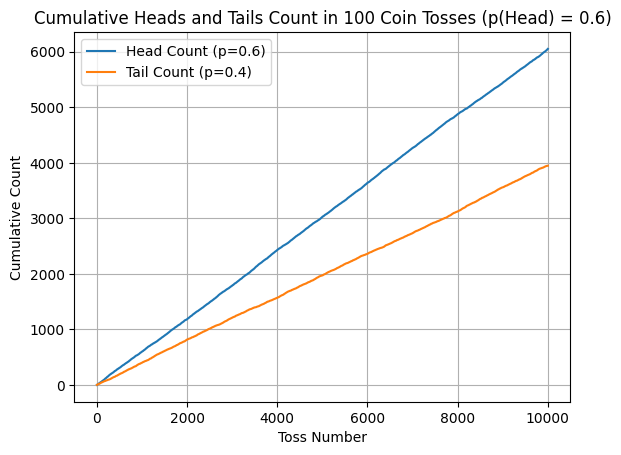

In [221]:

n2 =10000
results_ = [toss_a_biased_coin_2(head_prob)[0] for _ in range(n2)]

# Đếm số lần xuất hiện của 'Head' và 'Tail' theo xác suất mới
head_count = [0] * n2
tail_count = [0] * n2
# Thực hiện việc cho giá trị tổng ban đầu của 2 mặt là 0 để thực hiện việc tính tiếp theo
head_total = 0
tail_total = 0

for i in range(n2):
    # Vơi mỗi lần xét 1 giá trị thì tăng giá trị lên để thực hiện việc so sánh bằng đường tăng trưởng
    if results_[i] == 'H':
        head_total += 1 
    else:
        tail_total += 1
    head_count[i] = head_total
    tail_count[i] = tail_total


head_ratio = head_total / n2
tail_ratio = tail_total / n2
print(f"tỷ lệ mặt ngữa là {head_ratio}")
print(f"tỷ lệ mặt sấp là {tail_ratio}")

# Vẽ đồ thị với xác suất ra "Head" là 0.6
plt.plot(range(1, n2+1), head_count, label="Head Count (p=0.6)")
plt.plot(range(1, n2+1), tail_count, label="Tail Count (p=0.4)")
plt.xlabel("Toss Number")
plt.ylabel("Cumulative Count")
plt.title("Cumulative Heads and Tails Count in 100 Coin Tosses (p(Head) = 0.6)")
plt.legend()
plt.grid(True)
plt.show()

Nhận xét: sau khi xem xét qua 3 bảng đồ  thì tôi nhận thấy được biểu đồ sẽ càng trở nên tuyến tính và gần với đường thẳng tuyến tính nhất khi số lần tung đồng xu  chúng ta xét càng lớn
với giá trị số lần tung nhỏ (100) thì chúng ta có thể thấy sự chênh lệch của tỷ lệ tung đồng xu, nhưng càng về sau, chúng càng tiến về giá trẩn của xác suất cho trước mà chúng có

### Bài 3: Khảo sát hàm randint()

Hàm `randint()`dùng để phát sinh số nguyên ngẫu nhiên. Tuy nhiên, các kết quả ngẫu nhiên này có quy luật nào hay không, liệu ta có thể tin tưởng để sử dụng hàm này không? Trong ví dụ này bạn hãy thực hiện mô phỏng sau: phát sinh `n` số số ngẫu nhiên trong đoạn [1..40]. Với mỗi lần phát sinh bạn hãy vẽ histogram về `tần suất` xuất hiện của mỗi số.

a. Hãy vẽ đồ thị `tần suất` xuất hiện của các số với n=40, n=100, n=10000, n=1000000

b. Hãy đưa ra nhận xét của bạn về hàm `randint()`



value
0     1
1     1
3     1
5     3
6     2
7     1
8     1
10    3
11    1
12    2
13    1
14    1
16    1
17    1
20    1
22    2
23    3
24    2
26    1
28    3
29    1
30    1
32    2
33    1
34    1
36    1
39    1
Name: count, dtype: int64


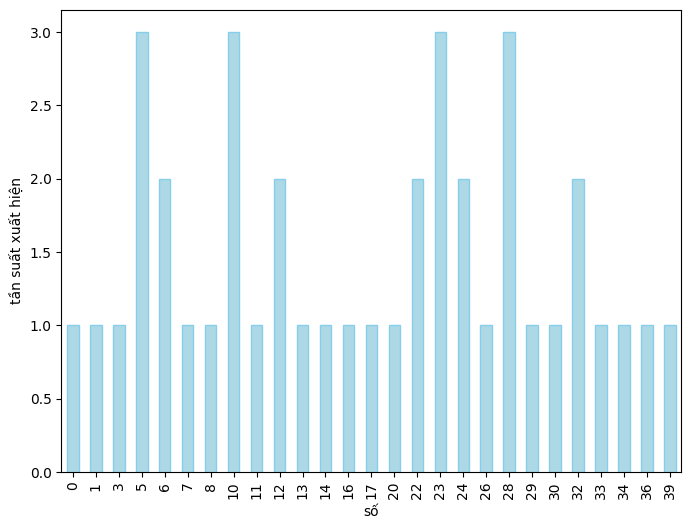

value
0     1
1     1
2     4
3     4
4     1
5     4
6     3
7     2
8     2
10    1
11    2
12    3
13    4
14    1
15    4
16    1
17    1
18    4
19    2
21    2
22    3
23    2
24    3
25    3
26    2
27    1
28    5
29    5
30    4
31    2
32    3
33    4
35    4
36    1
37    3
38    3
39    3
40    2
Name: count, dtype: int64


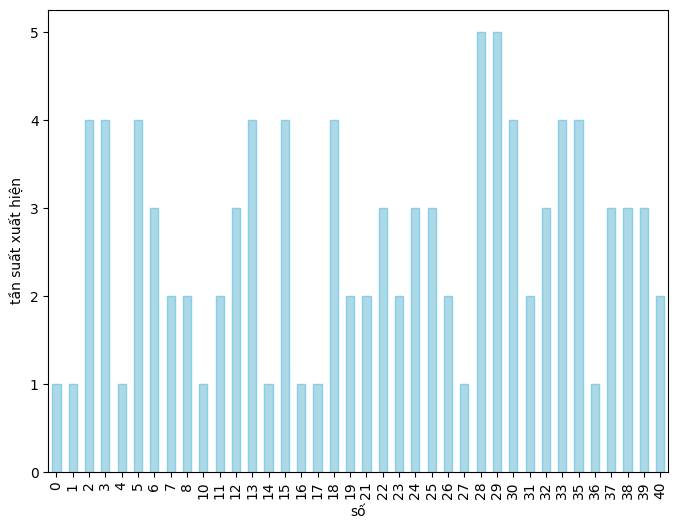

value
0     21
1     26
2     27
3     29
4     15
5     21
6     24
7     32
8     26
9     31
10    24
11    25
12    25
13    19
14    20
15    20
16    19
17    24
18    25
19    26
20    28
21    25
22    37
23    24
24    13
25    21
26    24
27    32
28    28
29    23
30    30
31    20
32    25
33    20
34    25
35    26
36    25
37    29
38    23
39    21
40    22
Name: count, dtype: int64


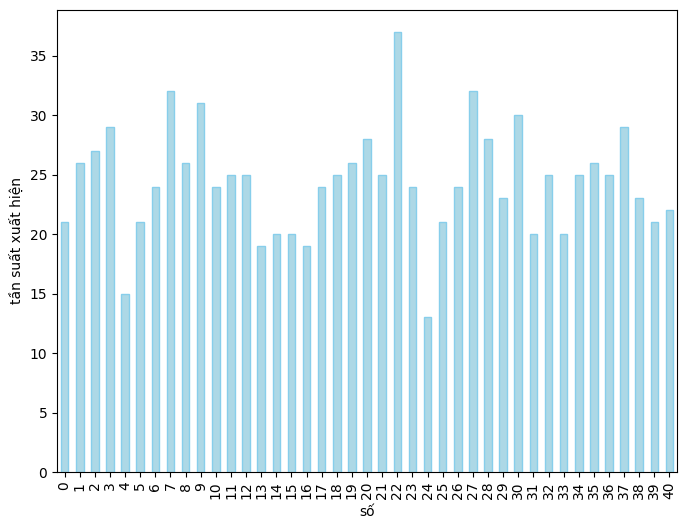

value
0     24180
1     24140
2     24365
3     24404
4     24602
5     24215
6     24378
7     24061
8     24776
9     24483
10    24306
11    24282
12    24628
13    24319
14    24798
15    24343
16    24240
17    24321
18    24719
19    24468
20    24132
21    24253
22    24434
23    24221
24    24627
25    24264
26    24495
27    24573
28    24348
29    24656
30    24227
31    24545
32    24325
33    24528
34    24592
35    24088
36    24203
37    24416
38    24335
39    24465
40    24245
Name: count, dtype: int64


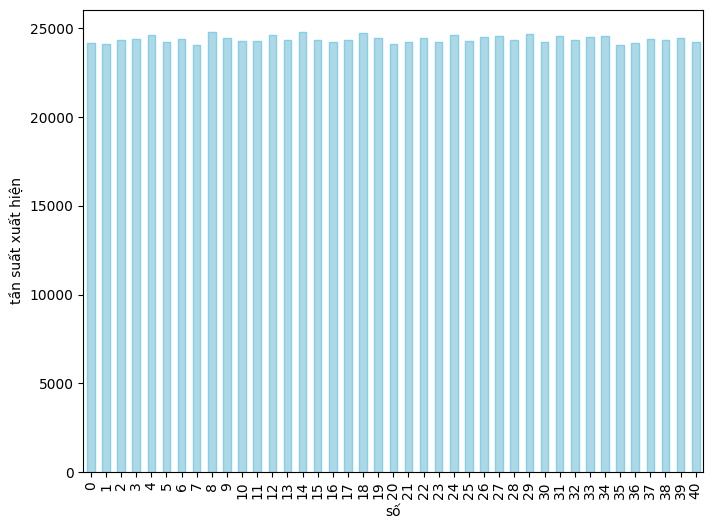

In [222]:
# YOUR CODE HERE
# Hãy vẽ đồ thị tần suất xuất hiện của các số với n = 40, n= 100, n= 1000 và n = 1000000
from random import randint

def Randint_survey(n):
    # arr = 
    df = pd.DataFrame({'value':[randint(0, 40) for _ in range(n)]})
    tsxh = df.value.value_counts().sort_index()
    print(tsxh)
    plt.figure(figsize= (8,6))
    tsxh.plot(kind= 'bar', color = "lightblue", edgecolor = 'skyblue')
    plt.ylabel("tần suất xuất hiện")
    plt.xlabel("số")
    plt.show()
    #
    
    
for k in [40, 100, 1000, 1000000]:
    Randint_survey(k) 

Nhận xét về hàm randint có  thể lập ra số với nhiều tần số khác nhau, và số lượng số càng nhiều thì đưa ra số lượng phần tử có tần suất xuất hiện trong khoảng giá trị là gần tương đương nhau

### Bài 4: Mô phỏng cách chọn mẫu

Trong bài tập này ta sẽ mô phỏng cách lấy mẫu từ một tập đã có sẵn.

a. Sử dụng hàm `randint()` để tạo 10 số ngẫu nhiên nằm trong đoạn [1..100]. Lưu kết quả vào biến `my_arr`

b. Sử dụng hàm `choice` để lấy ngẫu nhiên 5 phần tử từ mảng `my_arr`.

c. Thực hiện câu b, 10 lần. Với mỗi lần bạn hãy hiển thị 5 phần tử được chọn, tính giá trị trung bình và độ lệch chuẩn của các phần tử ấy

In [223]:
# YOUR CODE HERE
my_arr = [randint(0, 100) for _ in range(10)]

In [224]:
c5 = [random.choice(my_arr) for _ in range(5)]
print(c5)

[13, 30, 30, 13, 13]


In [225]:
for x in range(10):
    c5 = [random.choice(my_arr) for _ in range(5)]
    mean_ = np.mean(c5)
    gamma = np.std(c5)# độ lệch chuẩn của dãy số được chọn
    print(c5)
    print(f"Giá trị trung bình là {mean_}")
    print(f"Độ lệch chuẩn là {gamma}\n")

[49, 64, 49, 30, 64]
Giá trị trung bình là 51.2
Độ lệch chuẩn là 12.544321424453376

[49, 54, 82, 13, 54]
Giá trị trung bình là 50.4
Độ lệch chuẩn là 22.023623680039577

[64, 44, 4, 13, 64]
Giá trị trung bình là 37.8
Độ lệch chuẩn là 25.1745903640953

[49, 44, 10, 10, 84]
Giá trị trung bình là 39.4
Độ lệch chuẩn là 27.68104044287353

[54, 84, 64, 10, 44]
Giá trị trung bình là 51.2
Độ lệch chuẩn là 24.481829996958968

[84, 13, 44, 82, 49]
Giá trị trung bình là 54.4
Độ lệch chuẩn là 26.41666140904259

[64, 54, 44, 54, 13]
Giá trị trung bình là 45.8
Độ lệch chuẩn là 17.577258034175866

[54, 4, 13, 10, 84]
Giá trị trung bình là 33.0
Độ lệch chuẩn là 31.02257242718598

[44, 54, 54, 30, 4]
Giá trị trung bình là 37.2
Độ lệch chuẩn là 18.787229705307805

[44, 84, 64, 54, 84]
Giá trị trung bình là 66.0
Độ lệch chuẩn là 16.0



### Bài 5 Kiểm tra mảng phát sinh

Giả sử chiều cao của người trưởng thành dao động từ 140cm - 210cm.

a. Bạn hãy phát sinh ngẫu nhiên chiều cao của 1000 người và lưu vào mảng `heights`

b. Giả sử ta quy định mức chiều cao như sau:

- Mức thấp: chiều cao bé hơn 160cm
- Mức bình thường: chiều cao từ 160 đến bé hơn 175cm
- Mức cao: chiều cao từ 175cm đến bé hơn 190cm 
- Mức rất cao: chiều cao từ 190cm trở lên

Từ mảng đã phát sinh bạn hãy tính tỷ lệ mỗi mức. Lựa chọn đồ thị phù hợp để biểu diễn.

In [247]:
# YOUR CODE HERE
heights = np.random.randint(140, 211, 1000)
# print(heights)

In [248]:
mu =pd.DataFrame(heights).mean
sigma = pd.DataFrame(heights).std()

In [249]:
# Mức thấp
thap = [x for x in heights if x < 160]
# Mức bình thường
binhthuong = [x for x in heights if x in range( 160, 175) ]
# Mức cao
cao = [x for x in heights if x in range(175, 190)]
# Mức rất cao
ratcao = [x for x in heights if x >= 190]



In [250]:
tylethap = pd.DataFrame({'thap':thap      }).size / 1000 * 100
tyletb   = pd.DataFrame({'thap':binhthuong}).size / 1000 * 100
tylecao  = pd.DataFrame({'thap':cao       }).size / 1000 * 100
tylercao = pd.DataFrame({'thap':ratcao    }).size / 1000 * 100
print(tylethap,tyletb, tylecao, tylercao)

29.799999999999997 21.3 22.3 26.6


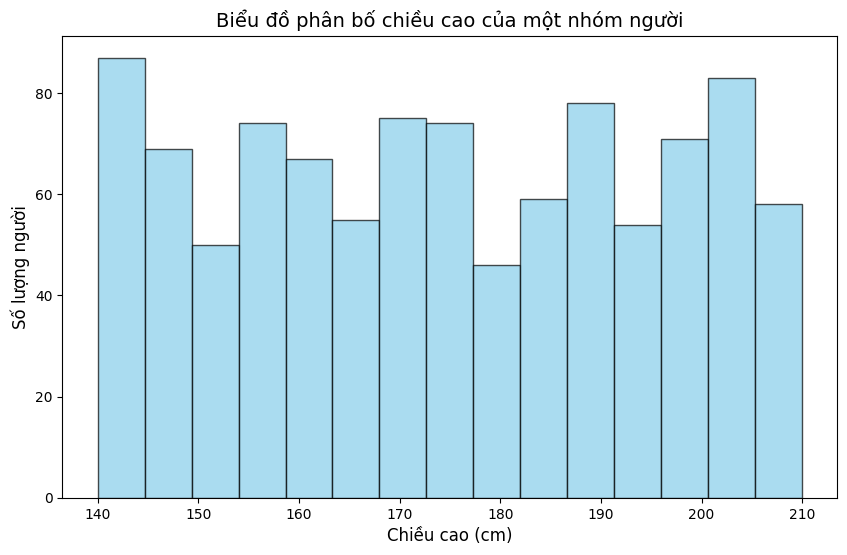

In [242]:


plt.figure(figsize=(10, 6))
plt.hist(heights, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Biểu đồ phân bố chiều cao của một nhóm người', fontsize=14)
plt.xlabel('Chiều cao (cm)', fontsize=12)
plt.ylabel('Số lượng người', fontsize=12)
plt.show()


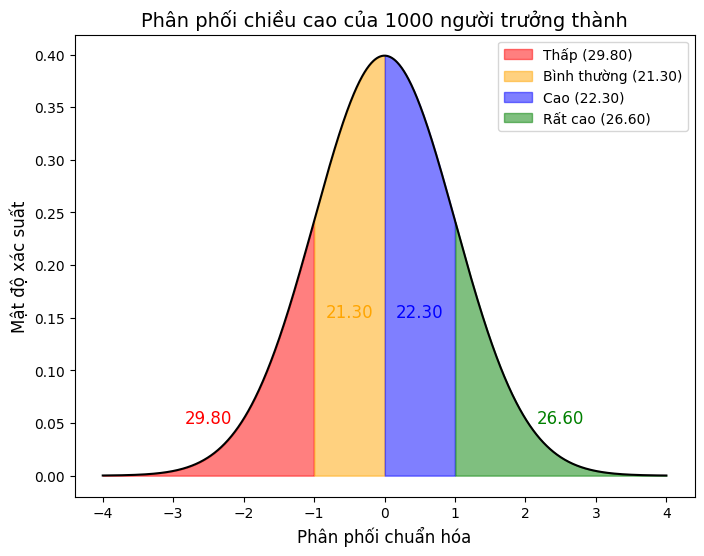

In [251]:

# Vẽ biểu đồ phân phối như yêu cầu
ratios = [tylethap, tyletb, tylecao, tylercao]
labels = ['Thấp', 'Bình thường', 'Cao', 'Rất cao']
colors = ['red', 'orange', 'blue', 'green']
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)
plt.figure(figsize=(8, 6))
# Tô màu cho các vùng theo tỷ lệ phần trăm
plt.fill_between(x, y, 
    where=(x < -1), color='red', alpha=0.5, 
    label=f'Thấp ({tylethap:.2f})')
plt.fill_between(x, y, 
    where=((x >= -1) & (x < 0)), color='orange', alpha=0.5, 
    label=f'Bình thường ({tyletb:.2f})')
plt.fill_between(x, y, 
    where=((x >= 0) & (x < 1)), color='blue', alpha=0.5, 
    label=f'Cao ({tylecao:.2f})')
plt.fill_between(x, y, 
    where=(x >= 1), color='green', alpha=0.5, 
    label=f'Rất cao ({tylercao:.2f})')
# Vẽ đường phân phối chuẩn
plt.plot(x, y, color='black')
# Thêm chú thích tỷ lệ phần trăm vào biểu đồ
plt.text(-2.5, 0.05, f'{tylethap:.2f}', horizontalalignment='center', fontsize=12, color='red')
plt.text(-0.5, 0.15, f'{tyletb:.2f}', horizontalalignment='center', fontsize=12, color='orange')
plt.text(0.5, 0.15, f'{tylecao:.2f}', horizontalalignment='center', fontsize=12, color='blue')
plt.text(2.5, 0.05, f'{tylercao:.2f}', horizontalalignment='center', fontsize=12, color='green')
# Thiết lập tiêu đề và nhãn
plt.title('Phân phối chiều cao của 1000 người trưởng thành', fontsize=14)
plt.xlabel('Phân phối chuẩn hóa', fontsize=12)
plt.ylabel('Mật độ xác suất', fontsize=12)
# Hiển thị chú giải
plt.legend()
# Hiển thị biểu đồ
plt.show()


## DỮ LIỆU

### Bài 6: dataset `temperature.csv`

Bạn hãy tìm cách đọc dữ liệu về nhiệt độ của các tỉnh thành trên với thư viện `numpy`.

a. Với mỗi tỉnh thành bạn hãy cho biết: nhiệt độ thấp nhất, nhiệt độ cao nhất, nhiệt độ trung bình, độ lệch chuẩn, độ biến thiên về nhiệt độ (`range=max-min`)

b. Vẽ histogram nhiệt độ của TP.HCM

c. Lựa chọn đồ thị để so sánh nhiệt độ của 6 tỉnh thành

In [232]:
temp

,time,Ha Noi,Vinh,Da Nang,Nha Trang,Ho Chi Minh,Ca Mau
0,00 15-9-2019,25.65,24.79,24.01,25.06,25.48,24.97
1,01 15-9-2019,25.31,24.21,24.02,24.93,25.16,24.83
2,02 15-9-2019,25.05,23.73,23.89,24.79,24.80,24.55
3,03 15-9-2019,24.79,23.36,23.83,24.84,24.74,24.48
4,04 15-9-2019,24.59,23.05,23.69,24.82,24.80,24.38
5,05 15-9-2019,30.80,22.80,23.52,24.79,24.87,24.40
6,06 15-9-2019,24.38,22.79,23.68,2.51,24.71,24.41
7,07 15-9-2019,26.72,25.61,24.92,26.56,25.03,24.91
8,08 15-9-2019,28.84,26.93,26.51,26.53,25.75,25.85
9,09 15-9-2019,30.29,28.72,27.48,26.95,26.64,26.79


In [262]:
# YOUR CODE HERE
temp = pd.read_csv("./data/temperature.csv")
size = temp['Ha Noi'].size
tempnotime = temp.drop(columns="time")
# print(tempnotime.sum())
print("Nhiệt độ trung bình của từng tỉnh là ",tempnotime.mean())
print("Nhiệt độ cao nhất của từng tỉnh là ",tempnotime.max())
print("Nhiệt độ thấp nhất của từng tỉnh là ",tempnotime.min())
#Độ lệch chuẩn của nhiệt độ là
print("Độ lệch chuẩn nhiệt độ cảu từng tỉnh là ",tempnotime.std())
print("Độ chênh lệch nhiệt độ của từng tỉnh là ",(tempnotime.max() - tempnotime.min()))

Nhiệt độ trung bình của từng tỉnh là  Ha Noi         28.378333
Vinh           26.794167
Da Nang        25.244583
Nha Trang      25.104583
Ho Chi Minh    27.444583
Ca Mau         26.901667
dtype: float64
Nhiệt độ cao nhất của từng tỉnh là  Ha Noi         32.05
Vinh           30.62
Da Nang        27.83
Nha Trang      27.47
Ho Chi Minh    58.00
Ca Mau         30.97
dtype: float64
Nhiệt độ thấp nhất của từng tỉnh là  Ha Noi         24.38
Vinh           22.79
Da Nang        23.52
Nha Trang       2.51
Ho Chi Minh    24.71
Ca Mau         24.38
dtype: float64
Độ lệch chuẩn nhiệt độ cảu từng tỉnh là  Ha Noi         2.535938
Vinh           2.683264
Da Nang        1.397028
Nha Trang      4.901094
Ho Chi Minh    6.608210
Ca Mau         2.161237
dtype: float64
Độ chênh lệch nhiệt độ của từng tỉnh là  Ha Noi          7.67
Vinh            7.83
Da Nang         4.31
Nha Trang      24.96
Ho Chi Minh    33.29
Ca Mau          6.59
dtype: float64


In [264]:
# Đọc dữ liệu từ file CSV bằng numpy
data = np.genfromtxt('./data/temperature.csv', delimiter=',', skip_header=1, dtype=None, encoding=None)

print(data)
# a. Tính toán cho mỗi tỉnh thành
results = {}

# Lặp qua từng tỉnh thành để tính toán
for province in np.unique(provinces):
    province_temps = temperatures[provinces == province]
    min_temp = np.min(province_temps)
    max_temp = np.max(province_temps)
    avg_temp = np.mean(province_temps)
    std_temp = np.std(province_temps)
    temp_range = max_temp - min_temp
    
    results[province] = {
        'Min': min_temp,
        'Max': max_temp,
        'Average': avg_temp,
        'Std Dev': std_temp,
        'Range': temp_range
    }

results

[('00 15-9-2019', 25.65, 24.79, 24.01, 25.06, 25.48, 24.97)
 ('01 15-9-2019', 25.31, 24.21, 24.02, 24.93, 25.16, 24.83)
 ('02 15-9-2019', 25.05, 23.73, 23.89, 24.79, 24.8 , 24.55)
 ('03 15-9-2019', 24.79, 23.36, 23.83, 24.84, 24.74, 24.48)
 ('04 15-9-2019', 24.59, 23.05, 23.69, 24.82, 24.8 , 24.38)
 ('05 15-9-2019', 30.8 , 22.8 , 23.52, 24.79, 24.87, 24.4 )
 ('06 15-9-2019', 24.38, 22.79, 23.68,  2.51, 24.71, 24.41)
 ('07 15-9-2019', 26.72, 25.61, 24.92, 26.56, 25.03, 24.91)
 ('08 15-9-2019', 28.84, 26.93, 26.51, 26.53, 25.75, 25.85)
 ('09 15-9-2019', 30.29, 28.72, 27.48, 26.95, 26.64, 26.79)
 ('10 15-9-2019', 31.35, 29.97, 26.96, 27.23, 27.68, 27.53)
 ('11 15-9-2019', 32.05, 28.93, 26.86, 27.38, 28.43, 28.98)
 ('12 15-9-2019', 31.31, 28.94, 26.65, 27.47, 28.29, 29.24)
 ('13 15-9-2019', 30.95, 30.25, 27.83, 27.44, 58.  , 30.66)
 ('14 15-9-2019', 30.56, 30.62, 26.49, 27.16, 27.67, 30.97)
 ('15 15-9-2019', 31.13, 30.58, 26.29, 26.68, 27.29, 30.59)
 ('16 15-9-2019', 30.8 , 30.2 , 26.6 , 2

NameError: name 'provinces' is not defined

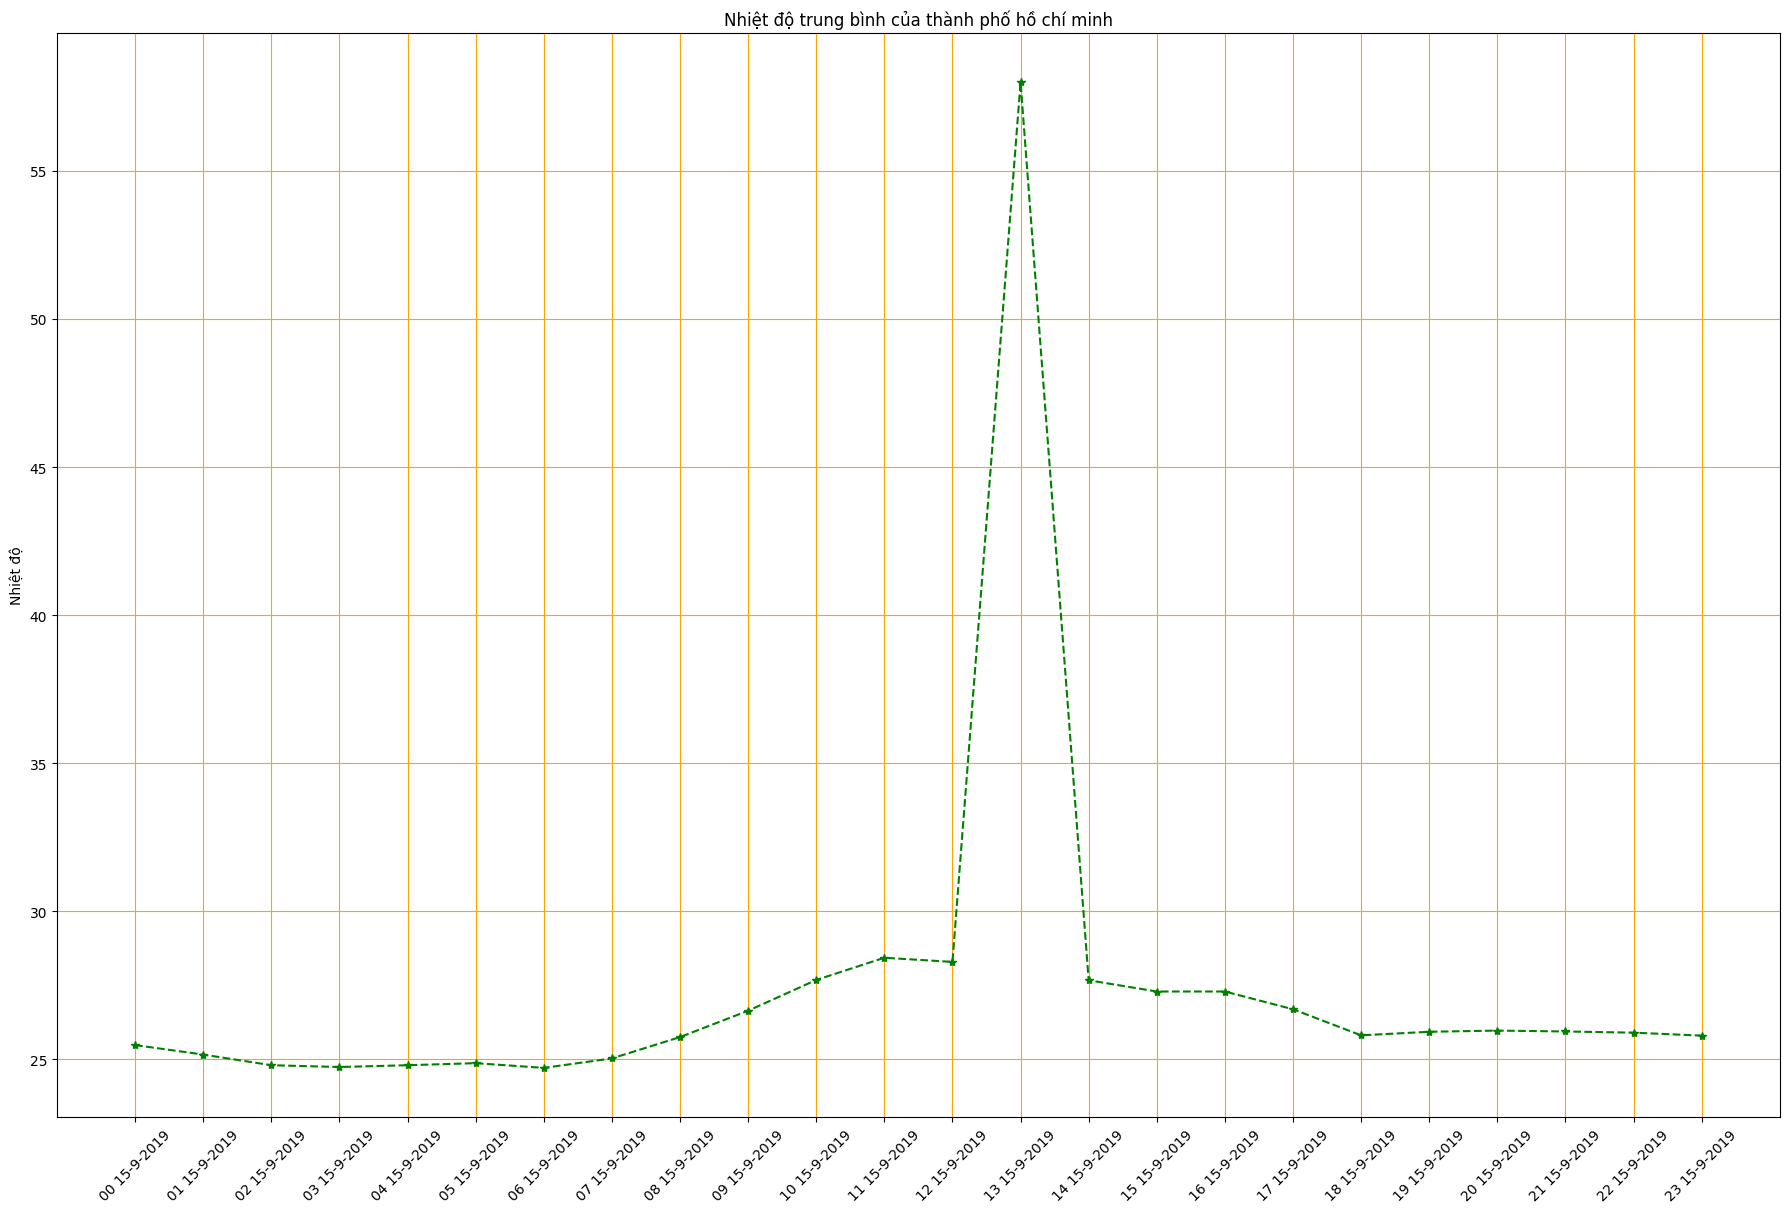

In [234]:
# Vẽ histogram của Thành phố Hồ Chí Minh là
plt.figure(figsize=(18, 12))

plt.plot(temp["time"],temp['Ho Chi Minh'], linestyle = '--', marker = "*", color= 'green')
# plt.xlabel("Tần suất")
plt.grid(color = 'orange')
plt.ylabel("Nhiệt độ")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.title("Nhiệt độ trung bình của thành phố hồ chí minh")
plt.show()


Lựa chọn đồ thị để so sánh nhiệt độ của 6 tỉnh

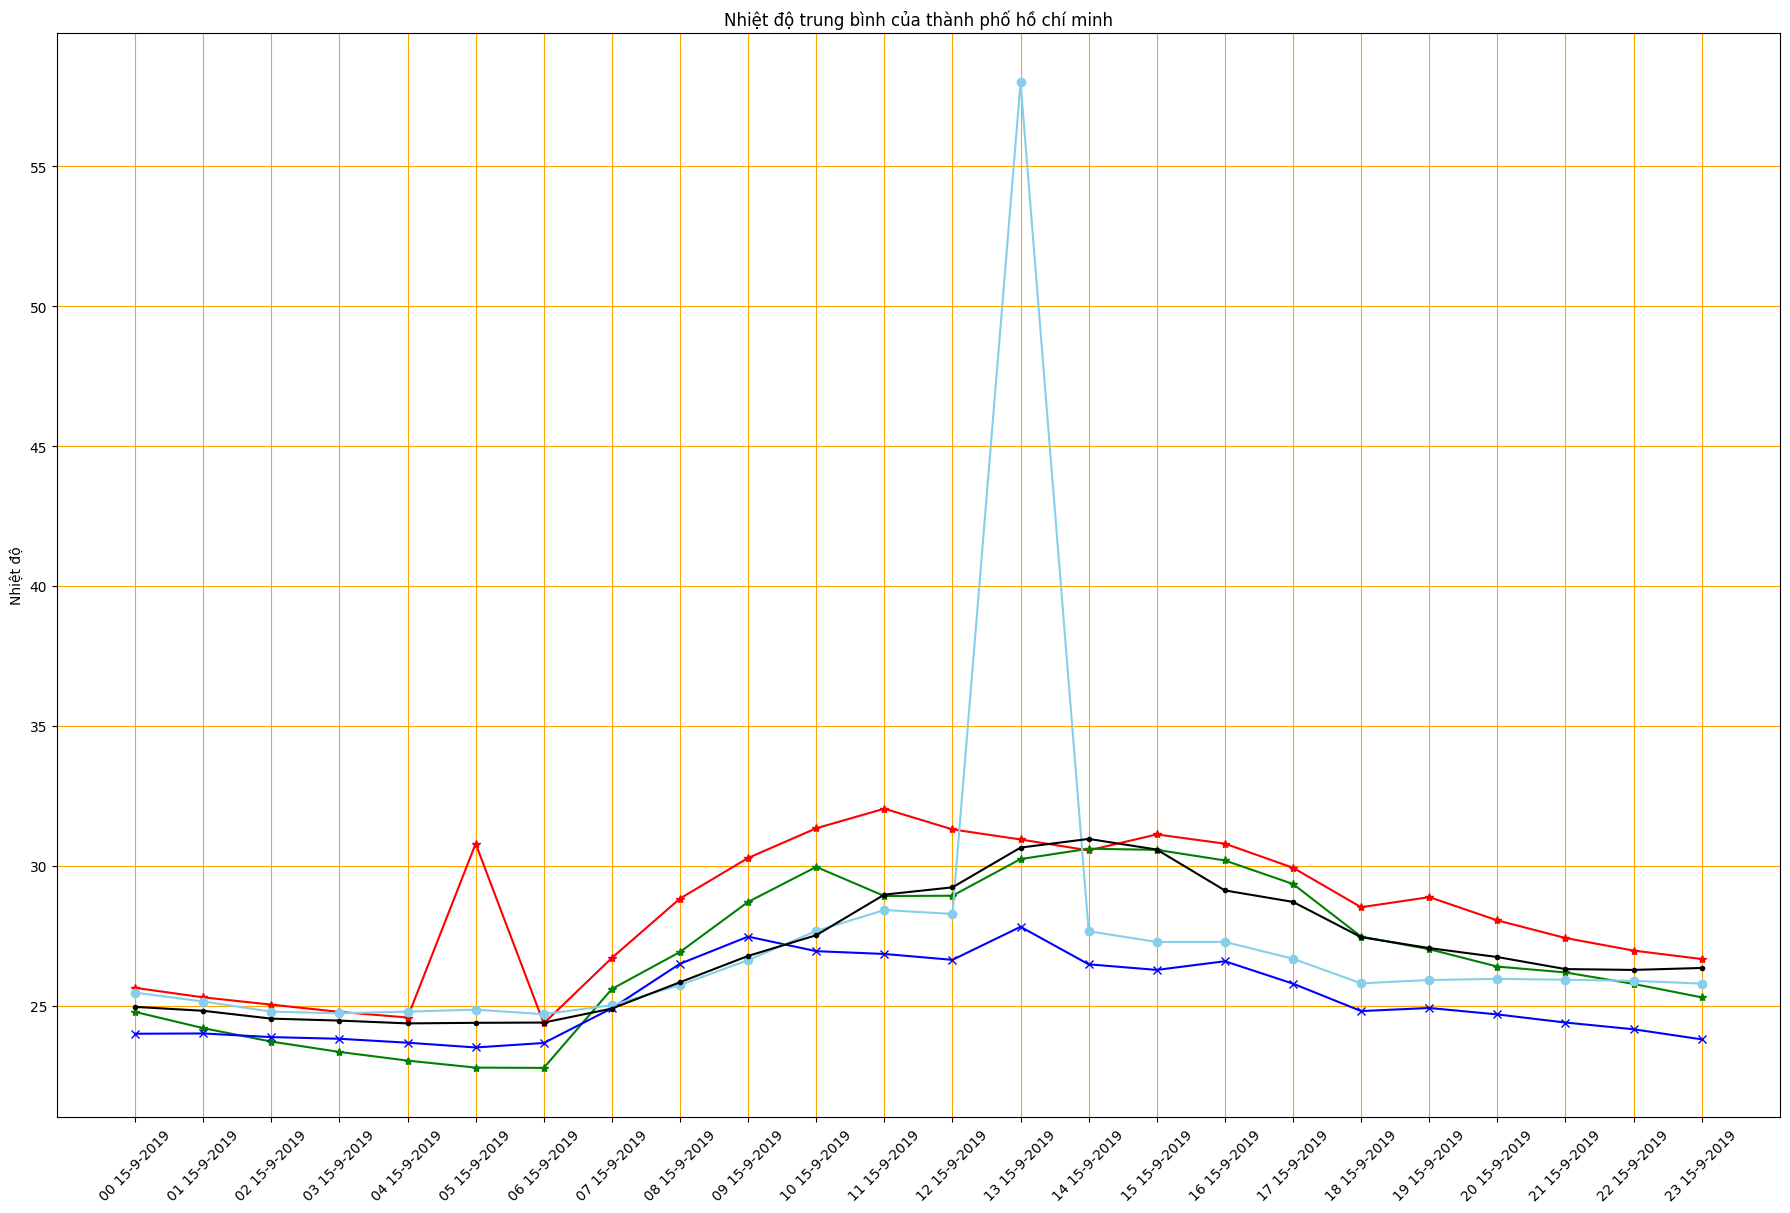

In [257]:
# Vẽ histogram của Thành phố Hồ Chí Minh là
plt.figure(figsize=(18, 12))

plt.plot(temp["time"],temp['Ha Noi'], linestyle = '-', marker = "*", color= 'red')
plt.plot(temp["time"],temp['Vinh'], linestyle = '-', marker = "*", color= 'green')
plt.plot(temp["time"],temp['Da Nang'], linestyle = '-', marker = "x", color= 'blue')
plt.plot(temp["time"],temp['Ho Chi Minh'], linestyle = '-', marker = "o", color= 'skyblue')
plt.plot(temp["time"],temp['Ca Mau'], linestyle = '-', marker = ".", color= 'black')

# plt.xlabel("Tần suất")
plt.grid(color = 'orange')
plt.ylabel("Nhiệt độ")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.title("Nhiệt độ trung bình của thành phố hồ chí minh")
plt.show()


### Bài 7: dataset `bmi.csv`

Bạn hãy tìm cách đọc dữ liệu về bmi của nhóm người khảo sát trên với thư viện `numpy`.

a. Hãy cho biết:
    - Tỷ lệ nam nữ
    - Các đại lượng thống kê: min, max, range, mean, standard deviation của hai thuộc tính chiều cao và cân nặng

b. Vẽ đồ thị histogram về chiều cao và cân nặng của hai thuộc tính chiều cao và cân nặng

c. Sử dụng hai đồ thị boxplot để so sánh chiều cao và cân nặng của nam và nữ

d. Để kiểm tra xem hai thuộc tính chiều cao và cân nặng có mối liên quan nào hay không, bạn có thể sử dụng đồ thị tán xạ (scatter plot). Giả sử muốn kiểm tra xem liệu một người cao hơn thì có cân nặng lớn hơn hay không, bạn hãy vẽ đồ thị scatter plot với trục hoành là chiều cao và trục tung là cân nặng

In [258]:
# YOUR CODE HERE
bmi  = pd.read_csv("./data/bmi.csv")

In [259]:
"""
Hãy cho biết:
    - tỷ lệ nam nữ
    - các đại lượng thống kê: Min, Max, range, mena, standard deviation của hai thuộc tính chiều cao và cân nặng
"""



 

## KHÁC

### Bài 8: Mô phỏng điểm bài kiểm tra

Giả sử điểm bài kiểm tra của học sinh có điểm môn Toán [0..10], với các phần lẻ có thể có là [0.25, 0.5, 0.75]

a. Dùng hàm ngẫu nhiên để phát sinh điểm số của một lớp học gồm của 10 học sinh. Tính điểm trung bình của lớp đó.

b. Giả sử một trường có 50 lớp học. Mỗi lớp học có 40 học sinh. Bạn hãy phát sinh ngẫu nhiên điểm của các học sinh trong 50 lớp học này

c. Giả sử nhà trường muốn thống kê tình hình học tập của 50 lớp học này. Nhà trường tiến hành thống kê bằng cách lấy điểm trung bình của tất cả các lớp học. Bạn hãy vẽ histogram điểm trung bình của 50 lớp học này. 

In [236]:
# YOUR CODE HERE



### Bài 9: Mô phỏng bốc ba lá bài

Một bộ bài tú lơ khơ có 52 lá. Với: 
    - Tập các nút là {2, 3,..10, J, Q, K, A}
    - Tập các chất là {'co', 'ro', 'chuong', 'bich`}

Bạn hãy mô phỏng:

a. Bốc 3 lá bài từ bộ bài trên. Lưu ý: không có trường hợp 1 bộ bài có hai lá trùng nhau

b. Tính điểm thu được (tổng điểm 3 lá)

c. Tìm hiểu cách hiển thị hình ảnh 3 lá bài đã bốc bằng python

In [237]:
# YOUR CODE HERE



### Bài 10: Mô phỏng Monte Carlo để ước lượng π

Ước lượng giá trị của π bằng phương pháp Monte Carlo. Ý tưởng là tạo ngẫu nhiên các điểm trong một hình vuông và xác định tỷ lệ các điểm nằm trong một phần tư hình tròn.

Công việc:

Tạo 100.000 điểm ngẫu nhiên (x, y) trong một hình vuông đơn vị.
Đếm số điểm nằm trong phần tư hình tròn có bán kính 1.
Ước lượng π bằng công thức: 4 * (số điểm trong hình tròn) / (tổng số điểm).

In [238]:
# YOUR CODE HERE


---